In [1]:
import psutil

def get_free_memory():
    memory = psutil.virtual_memory()
    return memory.available / (1024.0 ** 3)  # Convert bytes to gigabytes

print(f"Free CPU Memory: {get_free_memory():.2f} GB")

Free CPU Memory: 330.54 GB


In [2]:
import torch
torch.backends.cuda.matmul.allow_tf32 = True
from datasets import Dataset
import os

In [3]:
from tokenizers import Tokenizer
from tokenizers.models import WordLevel
from tokenizers.pre_tokenizers import WhitespaceSplit

tokenizer = Tokenizer(WordLevel(unk_token="[UNK]"))
tokenizer.pre_tokenizer = WhitespaceSplit()

In [4]:
tokenizer_path = "WordLevel_tokenizer_trained_InterPro.json"
tokenizer = tokenizer.from_file(tokenizer_path)
tokenizer.enable_truncation(512)

In [5]:
tokenizer.get_vocab_size()


544998

In [6]:
test = tokenizer.encode("WP_265490204 WP_206642677 WP_053312998 WP_251959347 WP_000076573 WP_227526754 WP_218401808 WP_106925592")
test.ids

[1, 2966, 754, 2545, 196, 9231, 2817, 7418, 2526, 2]

In [7]:
import csv

defense_ips = []
directory = "/home/toibazd/Defense_InterPros/"
file_list = os.listdir(directory)

for file in file_list:
    print(file)
    file_path = os.path.join(directory, file)
    with open(file_path, 'r', newline='') as infile:
        reader = csv.reader(infile, delimiter = "\t")
        next(reader)
        for row in reader:
            ip = row[0]
            defense_ips.append(ip)

LIT_IP.tsv
CRISPR_IP.tsv
BREX_IP.tsv
DISARM_IP.tsv
AbiH_IP.tsv
Kiwa_IP.tsv


In [8]:
print("Defense IPs number: ", len(defense_ips))

Defense IPs number:  120


In [9]:
from collections import defaultdict
import csv
from tqdm.auto import tqdm
import numpy as np

data_dict = defaultdict(list)

with open("/home/toibazd/Prot2IP.tsv", "r") as tsvfile:
    reader = csv.reader(tsvfile, delimiter = "\t")
    for row in tqdm(reader):
        key = row[0].split("prot_")[1].split(".")[0]
        iprs = eval(row[1])

        # Save only if there are filtered InterPro IDs
        for ip in iprs:
            if ip in defense_ips:
                data_dict[key].append(ip)


0it [00:00, ?it/s]

In [10]:
unique_defense = set()

# Iterate through each value list in the dictionary and add its elements to the set
for value_list in data_dict.values():
    unique_defense.update(value_list)

# Convert the set to a list if needed
unique_defense = list(unique_defense)

In [11]:
len(unique_defense)

83

In [12]:
from sklearn.preprocessing import MultiLabelBinarizer
enc = MultiLabelBinarizer()
one_hot_encoded = enc.fit_transform(data_dict.values())
one_hot_encoded_dict = {key: value for key, value in zip(data_dict.keys(), one_hot_encoded)}

print(len(one_hot_encoded_dict.keys()))

661


In [13]:
one_hot_encoded.shape

(661, 83)

In [14]:
# import os
# import random
# from tqdm import tqdm
# from concurrent.futures import ThreadPoolExecutor

# directory = '/ibex/user/toibazd/InterPro_annotated_genomes/'
# one_hot_encoded_sentences = {}

# sentence_length = 40
# sentences_per_IP = 100

# # Set random seed for reproducibility
# random.seed(42)

# # Randomly choose 1000 files with seed 42
# selected_files = os.listdir(directory)


# # Define a function to process a file
# def process_file(filename, IP):
#     sentences = []

#     filepath = os.path.join(directory, filename)

#     with open(filepath, 'r') as file:
#         content = file.read()
#         words = content.strip().split()

#         # Check if the key is in the file
#         for i in range(19, len(words)-20):
#             # Shuffle the indices of the words containing the key
#             if IP in data_dict[words[i]]:
#                 if len(words) - i >= 21:
#                     sentence = " ".join(words[i - 19:i + sentence_length - 19])
#                     sentences.append(sentence)
#     return sentences


# # Iterate over keys
# for IP in tqdm(unique_defense):
#     one_hot_encoded_sentences[IP] = []
#     sentences_count = 0

#     # Use ThreadPoolExecutor for concurrent processing
#     with ThreadPoolExecutor(max_workers=4) as executor:
#         futures = [executor.submit(process_file, filename, IP) for filename in selected_files]
#         for future in futures:
#             sentences = future.result()
#             one_hot_encoded_sentences[IP].extend(sentences)
#             sentences_count += len(sentences)
#             if sentences_count >= sentences_per_IP:
#                 break

#     # Break if the required number of sentences per key is reached


In [15]:
# for key, values in one_hot_encoded_sentences.items():
#     print(len(values))

In [16]:
# import json

# with open('BERT_sanity_check_defense_DNN_senteces.json', 'w') as f:
#     json.dump(one_hot_encoded_sentences, f)

In [17]:
import json
with open('BERT_sanity_check_defense_DNN_senteces.json', "r") as f:
    one_hot_encoded_sentences = json.load(f)
    
    
with open('BERT_sanity_check_defense_DNN_senteces_testing.json', "r") as f:
    test_sentences = json.load(f)

In [18]:
for key, value in one_hot_encoded_sentences.items():
    print(key, end=" ")
    print(len(value))

IPR010179 100
IPR013419 65
IPR047939 100
IPR010172 48
IPR049758 33
IPR025935 100
IPR019858 100
IPR013407 34
IPR027620 25
IPR013490 19
IPR013421 59
IPR013487 18
IPR017576 19
IPR013398 100
IPR010144 100
IPR005537 101
IPR019856 100
IPR021124 100
IPR006482 100
IPR002729 102
IPR021127 100
IPR013382 100
IPR047721 100
IPR013410 51
IPR013397 100
IPR013489 100
IPR010147 100
IPR017574 56
IPR013444 20
IPR005510 100
IPR019851 100
IPR049889 36
IPR031820 84
IPR013492 100
IPR010146 100
IPR010173 100
IPR033641 100
IPR049832 42
IPR028629 106
IPR013415 28
IPR013395 100
IPR010148 101
IPR027616 34
IPR010152 100
IPR032359 100
IPR017589 33
IPR047583 26
IPR030955 19
IPR047679 100
IPR019504 100
IPR023844 49
IPR013414 100
IPR013337 100
IPR019857 100
IPR010154 100
IPR048067 71
IPR017575 33
IPR013403 73
IPR027617 35
IPR019117 16
IPR021228 100
IPR013408 100
IPR016581 27
IPR019089 77
IPR019199 100
IPR013381 100
IPR013412 100
IPR023843 69
IPR013418 100
IPR019092 57
IPR013399 100
IPR014858 100
IPR013343 100
IPR01015

In [19]:
one_hot_encoded_sentences = {key: value for key, value in one_hot_encoded_sentences.items() if value}
print("Len of one_hot_encoded sentences items ",len(one_hot_encoded_sentences))

matching_string = one_hot_encoded_sentences.values()
print("Len of one_hot_encoded_sentences values ", len(matching_string))

matching_string = [item for sublist in matching_string for item in sublist]
print("Len of all sentences in matching strings: ", len(matching_string))

train_words_list = [sentence.split() for sentence in matching_string]

Len of one_hot_encoded sentences items  83
Len of one_hot_encoded_sentences values  83
Len of all sentences in matching strings:  6354


In [20]:
test_sentences = {key: value for key, value in test_sentences.items() if value}
print("Len of test sentences items", len(test_sentences))
test_matching_string = test_sentences.values()
print("Len of test sentences values", len(test_matching_string))
test_matching_string = [item for sublist in test_matching_string for item in sublist]
print("Len of test sentences in matching strings: ", len(test_matching_string))


Len of test sentences items 83
Len of test sentences values 83
Len of test sentences in matching strings:  2659


In [21]:

test_words_list = [sentence.split() for sentence in test_matching_string]

fit_word_list = train_words_list+test_words_list

In [22]:
count= 0
for string in fit_word_list:
    if not string[19] in data_dict.keys():
        print("False")
    else:
        count+=1
print(count)

9013


In [23]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
mlb.fit(fit_word_list)


one_hot_contexts = mlb.transform(train_words_list)
embeddings = one_hot_contexts.tolist()
one_hot_contexts.shape


(6354, 46045)

In [24]:
from transformers import BertModel

# Check if CUDA is available and choose device accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_path = "/home/toibazd/Data/BERT/BERT_context_pretrained_InterPro_final"

model = BertModel.from_pretrained(model_path).cuda()
model.pooler = None
model.eval()

[2024-03-12 14:54:13,483] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


Some weights of BertModel were not initialized from the model checkpoint at /home/toibazd/Data/BERT/BERT_context_pretrained_InterPro_final and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(544998, 256, padding_idx=0)
    (position_embeddings): Embedding(512, 256)
    (token_type_embeddings): Embedding(2, 256)
    (LayerNorm): LayerNorm((256,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=256, out_features=256, bias=True)
            (key): Linear(in_features=256, out_features=256, bias=True)
            (value): Linear(in_features=256, out_features=256, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=256, out_features=256, bias=True)
            (LayerNorm): LayerNorm((256,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
         

In [25]:
print(one_hot_encoded[1].shape)

(83,)


In [26]:
batch_size = 128 # Define your batch size
model.cuda()
ems = []
labels = []

# Define your data iterator in batches
for i in tqdm(range(0, len(matching_string), batch_size)):
    batch_sentences = matching_string[i:i+batch_size]

    batch_inputs = tokenizer.encode_batch(batch_sentences)
    input_ids_list = []
    attention_mask_list = []

    for encoding in batch_inputs:
        input_ids_list.append(encoding.ids)
        attention_mask_list.append(encoding.attention_mask)

    # Convert lists to tensors and move to device
    input_ids = torch.tensor(input_ids_list).cuda()
    attention_mask = torch.tensor(attention_mask_list).cuda()

    with torch.inference_mode():
        outputs = model(input_ids, attention_mask=attention_mask, output_hidden_states=True)
    hidden_states = outputs.last_hidden_state
    relevant_hidden_states = hidden_states[:, 20, :]  # Extract the 20th token's hidden state
    
    for j in range(len(batch_sentences)):
        ems.append(relevant_hidden_states[j].cpu())
        indicator = batch_sentences[j].split()[19]
        labels.append(one_hot_encoded_dict[indicator])

# Ensure order in embeddings matches order in labels

# Now embeddings and labels are stored on the CPU


  0%|          | 0/50 [00:00<?, ?it/s]

In [27]:
def calculate_pos_weights(class_counts):
    pos_weights = np.ones_like(class_counts)
    
    neg_counts = [len(embeddings)-pos_count for pos_count in class_counts]
    for cdx, (pos_count, neg_count) in enumerate(zip(class_counts,  neg_counts)):
      pos_weights[cdx] = neg_count / (pos_count + 1e-5)

    return torch.as_tensor(pos_weights, dtype=torch.float)
class_counts = np.array(labels).sum(axis=0)
pos_weights = calculate_pos_weights(class_counts) 

In [28]:
pos_weights

tensor([  6.,  55.,  13.,  22.,  62.,  62.,  32.,  38.,  62.,  62.,  26.,  54.,
         62., 452., 116.,  47.,  62.,  62.,  61.,  41.,  62.,  50.,  62.,  62.,
         62.,  62.,  62.,  86., 185.,  62., 118.,  43.,  54.,  30., 225.,  43.,
         93., 106., 316., 351.,  62., 301.,  62.,  62.,  62., 146., 112., 191.,
        333., 191.,  81.,  54., 396.,  30.,  62.,  28.,  58.,  60.,  58.,  59.,
         14.,  46.,  62.,  91., 121.,  62., 185., 180., 253.,  58., 333.,  74.,
         62.,  29., 243.,  62.,  62.,  62.,  88., 191., 372., 150., 175.])

In [29]:
import random

random.seed(42)
# Zip the lists together
combined = list(zip(embeddings, labels))

# Shuffle the combined list
random.shuffle(combined)

# Unzip the shuffled list
embeddings, labels = zip(*combined)



In [30]:
model.to("cpu")
torch.cuda.empty_cache()

In [31]:
import torch.nn as nn

class Classification_V0(nn.Module):
    def __init__(self, input_dim, first_hidden, second_hidden, last_hidden, output_dim, dropout_prob):
        super(Classification_V0, self).__init__()
        self.fc1 = nn.Linear(input_dim, first_hidden)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(first_hidden, second_hidden)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(second_hidden, last_hidden)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(last_hidden, output_dim)
        
        self.dropout = nn.Dropout(dropout_prob)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout(x)
        x = self.fc4(x)
        return x

input_dim = 46045
first_hidden = 2000
second_hidden = 100
last_hidden = 500
output_dim = 83
dropout_prob = 0.25

clf_model = Classification_V0(input_dim, first_hidden, second_hidden, last_hidden, output_dim, dropout_prob)


In [32]:
from torch.utils.data import DataLoader, TensorDataset
import torch.optim.lr_scheduler as lr_scheduler

batch_size = 256
def data_generator(embeddings, labels, batch_size):
    num_samples = len(embeddings)
    for i in range(0, num_samples, batch_size):
        batch_embeddings = embeddings[i:i+batch_size]
        batch_labels = labels[i:i+batch_size]
        yield batch_embeddings, batch_labels


optimizer = torch.optim.Adam(clf_model.parameters(), lr=0.001)
scheduler = lr_scheduler.StepLR(optimizer=optimizer, step_size=10, gamma=0.1)
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weights)

In [33]:
import numpy as np

num_epochs = 20
epoch_loss = []
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}:")
    
    # Initialize data generator
    generator = data_generator(embeddings, labels, batch_size)
    train_loss = 0
    # Iterate over batches
    for batch_embeddings, batch_labels in tqdm(generator, desc="Training Batches", leave=False):
        
        optimizer.zero_grad()
        
        batch_embeddings_tensor = torch.tensor(batch_embeddings, dtype= torch.float32)
        batch_labels = np.array(batch_labels)
        batch_labels_tensor = torch.tensor(batch_labels, dtype = torch.float32)
        
        outputs = clf_model(batch_embeddings_tensor)
        loss = criterion(outputs, batch_labels_tensor)
        train_loss+=loss.item()

        loss.backward()
        optimizer.step()
    scheduler.step()
    epoch_loss.append(train_loss/(len(embeddings)/batch_size))
    print(train_loss/(len(embeddings)/batch_size))
print("Training finished.")

Epoch 1/20:


Training Batches: 0it [00:00, ?it/s]

1.1434291158789616
Epoch 2/20:


Training Batches: 0it [00:00, ?it/s]

0.44719090640338516
Epoch 3/20:


Training Batches: 0it [00:00, ?it/s]

0.24648814551065582
Epoch 4/20:


Training Batches: 0it [00:00, ?it/s]

0.20634244379098213
Epoch 5/20:


Training Batches: 0it [00:00, ?it/s]

0.1838738450772889
Epoch 6/20:


Training Batches: 0it [00:00, ?it/s]

0.16871458395194588
Epoch 7/20:


Training Batches: 0it [00:00, ?it/s]

0.1514827931193687
Epoch 8/20:


Training Batches: 0it [00:00, ?it/s]

0.13985043574625267
Epoch 9/20:


Training Batches: 0it [00:00, ?it/s]

0.13079119073845585
Epoch 10/20:


Training Batches: 0it [00:00, ?it/s]

0.12241027052761963
Epoch 11/20:


Training Batches: 0it [00:00, ?it/s]

0.11339473063967534
Epoch 12/20:


Training Batches: 0it [00:00, ?it/s]

0.10986413376339585
Epoch 13/20:


Training Batches: 0it [00:00, ?it/s]

0.10654813432078111
Epoch 14/20:


Training Batches: 0it [00:00, ?it/s]

0.10586712830915442
Epoch 15/20:


Training Batches: 0it [00:00, ?it/s]

0.10258018276321464
Epoch 16/20:


Training Batches: 0it [00:00, ?it/s]

0.10289664294009018
Epoch 17/20:


Training Batches: 0it [00:00, ?it/s]

0.1016607413623631
Epoch 18/20:


Training Batches: 0it [00:00, ?it/s]

0.10165263017769088
Epoch 19/20:


Training Batches: 0it [00:00, ?it/s]

0.0979758416627014
Epoch 20/20:


Training Batches: 0it [00:00, ?it/s]

0.09899614110171588
Training finished.


In [34]:
# directory = '/ibex/user/toibazd/InterPro_annotated_genomes_for_testing/'
# one_hot_encoded_sentences_2 = {}

# sentence_length = 40
# sentence_per_IP = 50
# selected_files = os.listdir(directory)

# total_sentences = sum(len(sentences) for sentences in one_hot_encoded_sentences.values())

# # Iterate over keys
# for IP in tqdm(unique_defense):
#     one_hot_encoded_sentences_2[IP] = []
#     sentences_count=0
    
#     # Iterate over selected files
#     for filename in selected_files:
#         filepath = os.path.join(directory, filename)

#         with open(filepath, 'r') as file:
#             content = file.read()
#             words = content.strip().split()

#             # Check if the key is in the file
#             for i in range(19, len(words)-20):
#                 # Shuffle the indices of the words containing the key
#                 if IP in data_dict[words[i]]:
#                     if len(words) - i >= 21:
#                         sentence = " ".join(words[i - 19:i + sentence_length - 19])
#                         one_hot_encoded_sentences_2[IP].append(sentence)
#                         sentences_count += 1
#                         if sentences_count>=sentence_per_IP:
#                             break
#         if sentences_count>=sentence_per_IP:
#             break
#     print(sentences_count)
            


In [35]:
# for key, value in one_hot_encoded_sentences_2.items():
#     print(len(value))

In [36]:
# import json

# with open('BERT_sanity_check_defense_DNN_senteces_testing.json', 'w') as f:
#     json.dump(one_hot_encoded_sentences_2, f)

In [37]:
with open('BERT_sanity_check_defense_DNN_senteces_testing.json', "r") as f:
    test_sentences = json.load(f)
print(len(test_sentences))

83


In [38]:
test_sentences = {key: value for key, value in test_sentences.items() if value}
print(len(test_sentences))
test_matching_string = test_sentences.values()
len(test_matching_string)
test_matching_string = [item for sublist in test_matching_string for item in sublist]
len(test_matching_string)


83


2659

In [39]:

words_list = [sentence.split() for sentence in test_matching_string]
one_hot_contexts = mlb.transform(words_list)
embeddings = one_hot_contexts.tolist()
one_hot_contexts.shape

(2659, 46045)

In [40]:
from bertviz import model_view

batch_size = 128 # Define your batch size
# model.cuda()
test_ems = []
test_labels = []

# Define your data iterator in batches
for i in tqdm(range(0, len(test_matching_string), batch_size)):
    batch_sentences = test_matching_string[i:i+batch_size]
    batch_inputs = tokenizer.encode_batch(batch_sentences)
    input_ids_list = []
    attention_mask_list = []

    for encoding in batch_inputs:
        input_ids_list.append(encoding.ids)
        attention_mask_list.append(encoding.attention_mask)
    # Convert lists to tensors and move to device
    try:
        input_ids = torch.tensor(input_ids_list)
    except:
        for ins in input_ids_list:
            if len(ins)!=42:
                print(len(ins))
                print(ins)
    attention_mask = torch.tensor(attention_mask_list)

    with torch.inference_mode():
        outputs = model(input_ids, attention_mask=attention_mask, output_hidden_states=True, output_attentions = True)
    hidden_states = outputs.last_hidden_state
    attentions = outputs.attentions[-1]
    relevant_hidden_states = hidden_states[:, 20, :]  # Extract the 20th token's hidden state
#     for i in range(len(batch_sentences)):
#         if i < 20:
#             att = []
#             extracted_tensor = attentions[i, :, :, :]
#             extracted_tensor = extracted_tensor.unsqueeze(0)
#             print(extracted_tensor.shape)
#             att.append(extracted_tensor)

#             tokens = "[CLS] "+tokenizer.decode(input_ids_list[i])+" [SEP]"
#             tokens = tokens.split(" ")
#             model_view(att, tokens)
    for j in range(len(batch_sentences)):
        # Move embeddings to CPU
        test_ems.append(relevant_hidden_states[j].cpu())
        indicator = batch_sentences[j].split()[19]
        test_labels.append(one_hot_encoded_dict[indicator])


  0%|          | 0/21 [00:00<?, ?it/s]

In [41]:
tokenizer.decode([0,12,12,12,12,
                 ])

'WP_072018053 WP_072018053 WP_072018053 WP_072018053'

In [42]:
model.to("cpu")
torch.cuda.empty_cache()

In [43]:
clf_model.eval()

Classification_V0(
  (fc1): Linear(in_features=46045, out_features=2000, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=500, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=500, out_features=83, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

In [45]:
generator = data_generator(embeddings, test_labels, batch_size)

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np


all_predictions = []
all_labels = []
all_probs = []

count = 0
for batch_embeddings, batch_labels in tqdm(generator, desc="Evaluation Batches", leave=False):
    batch_embeddings_tensor = torch.tensor(batch_embeddings, dtype= torch.float32)
    batch_labels = np.array(batch_labels)
    logits = clf_model(batch_embeddings_tensor)
    predictions = torch.sigmoid(logits)
    thresholded_predictions = (predictions > 0.85).float()
    all_predictions.append(thresholded_predictions.detach().numpy())
    all_labels.append(batch_labels)
    all_probs.append(predictions.detach().numpy())


Evaluation Batches: 0it [00:00, ?it/s]

In [47]:
len(all_predictions[0])

128

In [48]:
len(all_labels[-1])
    

99

In [49]:
print(all_predictions[-1].shape)

(99, 83)


In [50]:
print(all_labels[-1].shape)

(99, 83)


In [51]:

# Concatenate predictions and labels across all batches
all_predictions = np.concatenate(all_predictions)
all_labels = np.concatenate(all_labels)
all_probs = np.concatenate(all_probs)

In [52]:
all_predictions.shape

(2659, 83)

In [54]:
from sklearn import metrics
auc_scores = []

for i in range(all_labels.shape[1]):  # Iterate over each column
    y = all_labels[:, i]
    pred_y = all_probs[:, i]

    fpr, tpr, thresholds = metrics.roc_curve(y, pred_y)
    auc_score = metrics.auc(fpr, tpr)
    auc_scores.append(auc_score)

print("AUC for each column:")
for idx, score in enumerate(auc_scores):
    print(idx,": ", score)

AUC for each column:
0 :  0.9115893141675424
1 :  0.9798154555940024
2 :  0.9771546119247085
3 :  0.9524480739829213
4 :  0.9760367957071674
5 :  0.9928478344193178
6 :  0.9781854425232488
7 :  0.9767569659442725
8 :  0.981801456496742
9 :  0.9890226140283633
10 :  0.9916614823109784
11 :  0.9731867053785679
12 :  0.9694212341893446
13 :  0.9993971363978901
14 :  0.9981970649895178
15 :  0.9899642393857588
16 :  0.9725642008432349
17 :  0.9973103722156034
18 :  0.9962287515479005
19 :  0.9422222642890495
20 :  0.9662974319662706
21 :  0.9690172214930597
22 :  0.9827405136067459
23 :  0.9835875814488311
24 :  0.9786814871598314
25 :  0.9689152932157914
26 :  0.9733767727098506
27 :  0.9978487121344265
28 :  0.9949742429953512
29 :  0.9848256036795707
30 :  0.9957331893059682
31 :  0.9641245272224518
32 :  0.9989595157018539
33 :  0.991227981932862
34 :  0.9996233521657251
35 :  0.9701160541586075
36 :  1.0
37 :  0.9979217523256583
38 :  0.9996236356793377
39 :  0.9992472713586751
40 :  

In [55]:
from sklearn import metrics

y = all_labels.flatten()
pred_y = all_probs.flatten()

fpr, tpr, thresholds = metrics.roc_curve(y, pred_y)
print(metrics.auc(fpr, tpr))

0.9834880401346162


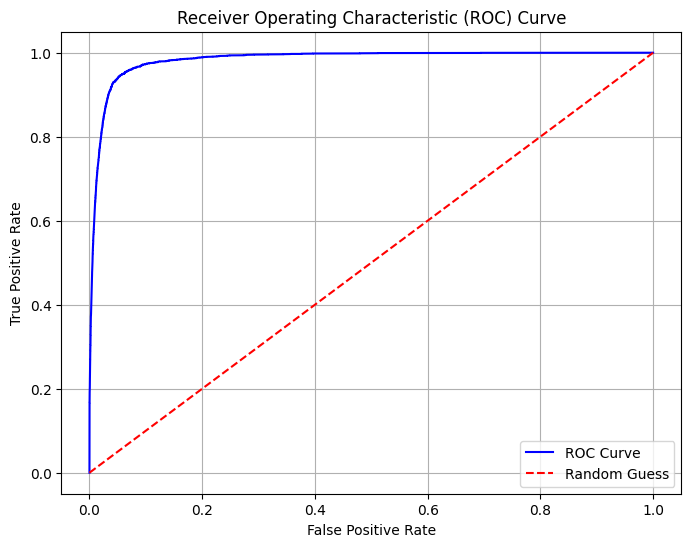

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [57]:
all_labels.shape

(2659, 83)

In [58]:
cl_report = multilabel_confusion_matrix(all_labels, all_predictions)
print("Classification report:")
print(len(cl_report))

Classification report:
83


In [59]:
print(cl_report[0])

[[2178   91]
 [ 221  169]]


In [60]:
from sklearn.metrics import classification_report

report = classification_report(all_labels, all_predictions, zero_division=np.nan)

In [61]:
all_predictions.sum(axis=0)

array([260., 163., 242., 166.,  78.,  85., 106., 131., 153., 114., 125.,
       125., 121.,  12.,  23., 135., 124.,  65.,  63., 116.,  88., 115.,
       116., 140., 181., 201., 160.,  24.,  13., 129.,  32., 163.,  21.,
       101.,  16., 162.,   6.,  51.,   8.,   5.,  95.,   4.,  56.,  38.,
       116.,  16.,  36.,  19.,  18.,  20.,  26.,  21.,  12.,  87.,  33.,
       144., 101., 121.,  90.,  67., 202.,  59.,  40.,  39.,  24.,  49.,
        29.,  29.,  29.,  58.,   3.,  34.,  44., 144.,   2., 129.,  47.,
       117.,  16.,   9.,   4.,  14.,   4.], dtype=float32)

In [62]:
print(report)

              precision    recall  f1-score   support

           0       0.65      0.43      0.52       390
           1       0.31      0.88      0.46        58
           2       0.64      0.82      0.72       190
           3       0.43      0.68      0.52       105
           4       0.49      0.76      0.59        50
           5       0.55      0.94      0.70        50
           6       0.62      0.75      0.68        88
           7       0.48      0.84      0.61        75
           8       0.28      0.86      0.42        50
           9       0.38      0.86      0.52        50
          10       0.63      0.84      0.72        94
          11       0.31      0.67      0.43        58
          12       0.34      0.82      0.48        50
          13       0.42      1.00      0.59         5
          14       0.39      1.00      0.56         9
          15       0.44      0.91      0.60        66
          16       0.33      0.82      0.47        50
          17       0.32    

In [ ]:
list(enc.classes_)[36]

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
num_classes = 83
# Compute precision, recall, and thresholds for each class
precision = dict()
recall = dict()
thresholds = dict()
average_precision = dict()

for i in range(num_classes):  # num_classes is the number of classes
    precision[i], recall[i], thresholds[i] = precision_recall_curve(all_labels[:, i], all_predictions[:, i])
    average_precision[i] = average_precision_score(all_labels[:, i], all_predictions[:, i])

# Compute micro-average precision-recall curve and AUC
precision["micro"], recall["micro"], _ = precision_recall_curve(all_labels.ravel(), all_predictions.ravel())
average_precision["micro"] = average_precision_score(all_labels, all_predictions, average="micro")

# Compute ROC curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(all_labels[:, i], all_predictions[:, i])
    roc_auc[i] = roc_auc_score(all_labels[:, i], all_predictions[:, i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(all_labels.ravel(), all_predictions.ravel())
roc_auc["micro"] = roc_auc_score(all_labels, all_predictions, average="micro")

# Split classes into groups of 10
class_groups = [list(range(i, min(i + 10, num_classes))) for i in range(0, num_classes, 10)]

# Plot Precision-Recall and ROC curves for each group
for group in class_groups:
    plt.figure(figsize=(12, 6))

    # Plot Precision-Recall curve
    plt.subplot(1, 2, 1)
    plt.step(recall['micro'], precision['micro'], where='post', label='Micro-average Precision-Recall curve (AUPR = {0:0.2f})'
                 ''.format(average_precision["micro"]))
    for i in group:
        plt.step(recall[i], precision[i], where='post', label='Precision-recall curve of class {0} (AUPR = {1:0.2f})'
                 ''.format(i, average_precision[i]))

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve (Classes {})'.format(group))
    plt.legend(loc="best")

    # Plot ROC curve
    plt.subplot(1, 2, 2)
    plt.plot(fpr['micro'], tpr['micro'], label='Micro-average ROC curve (AUC = {0:0.2f})'
                 ''.format(roc_auc["micro"]))
    for i in group:
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Classes {})'.format(group))
    plt.legend(loc="best")

    plt.tight_layout()
    plt.show()


In [1]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.5.
The scikit-learn version is 1.4.1.post1.
